


Group 11: Lamine Diakite




In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving test.csv to test (2).csv


In [ ]:
import io
df= pd.read_csv(io.BytesIO(uploaded['test.csv']))
df

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco              160                      5   
1      Business             2863                      1   
2           Eco              192                      2   
3      Business             3377                      0   
4           Eco             1182                      2   
...         ...              ...                    ...   
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                      4  ...                       5   
1                                      1  ...                       4   
2                                      0  ...                       2   
3                                      0  ...                       1   
4                                      3  ...                       2   
...                                  ...  ...                     ...   
25971                                  3  ...                       4   
25972                                  4  ...                       4   
25973                                  5  ...                       2   
25974                                  3  ...                       4   
25975                                  5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
0                     5                 5                 5                2   
1                     4                 4                 4                3   
2                     4                 1                 3                2   
3                     1                 1                 1                3   
4                     2                 2                 2                4   
...                 ...               ...               ...              ...   
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
0                     5            5                          50   
1                     4            5                           0   
2                     2            2                           0   
3                     1            4                           0   
4                     2            4                           0   
...                 ...          ...                         ...   
25971                 5            4                       

In [ ]:
df = df.drop(['Unnamed: 0','id','Customer Type','Type of Travel','Class'],axis=1)

In [ ]:
df

Gender  Age  Flight Distance  Inflight wifi service  \
0      Female   52              160                      5   
1      Female   36             2863                      1   
2        Male   20              192                      2   
3        Male   44             3377                      0   
4      Female   49             1182                      2   
...       ...  ...              ...                    ...   
25971    Male   34              526                      3   
25972    Male   23              646                      4   
25973  Female   17              828                      2   
25974    Male   14             1127                      3   
25975  Female   42              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0                  4               3                4             3   
1                  1               5                4             5   
2                  4               2                2             2   
3                  2               3                4             4   
4                  3               4                1             2   
...              ...             ...              ...           ...   
25971              1               4                3             4   
25972              4               4                4             4   
25973              5               2                1             2   
25974              3               4                4             4   
25975              5               4                2             2   

       Inflight entertainment  On-board service  Leg room service  \
0                           5                 5                 5   
1                           4                 4                 4   
2                           2                 4                 1   
3                           1                 1                 1   
4                           2                 2                 2   
...                       ...               ...               ...   
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974                       4                 3                 2   
25975                       1                 1                 2   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     5                2                 5            5   
1                     4                3                 4            5   
2                     3                2                 2            2   
3                     1                3                 1            4   
4                     2                4                 2            4   
...                 ...              ...               ...          ...   
25971                 4                4                 5            4   
25972                 5                5                 5            4   
25973                 4                5                 4            2   
25974        

# we removed some of the categorical variables such as ID, customer type, trip type, and class.

<Axes: >

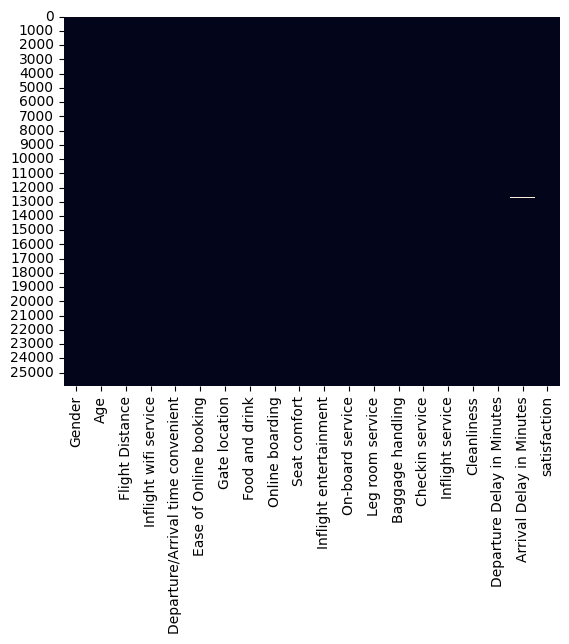

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.fillna(0,inplace=True)
df

Gender  Age  Flight Distance  Inflight wifi service  \
0      Female   52              160                      5   
1      Female   36             2863                      1   
2        Male   20              192                      2   
3        Male   44             3377                      0   
4      Female   49             1182                      2   
...       ...  ...              ...                    ...   
25971    Male   34              526                      3   
25972    Male   23              646                      4   
25973  Female   17              828                      2   
25974    Male   14             1127                      3   
25975  Female   42              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0                  4               3                4             3   
1                  1               5                4             5   
2                  4               2                2             2   
3                  2               3                4             4   
4                  3               4                1             2   
...              ...             ...              ...           ...   
25971              1               4                3             4   
25972              4               4                4             4   
25973              5               2                1             2   
25974              3               4                4             4   
25975              5               4                2             2   

       Inflight entertainment  On-board service  Leg room service  \
0                           5                 5                 5   
1                           4                 4                 4   
2                           2                 4                 1   
3                           1                 1                 1   
4                           2                 2                 2   
...                       ...               ...               ...   
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974                       4                 3                 2   
25975                       1                 1                 2   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     5                2                 5            5   
1                     4                3                 4            5   
2                     3                2                 2            2   
3                     1                3                 1            4   
4                     2                4                 2            4   
...                 ...              ...               ...          ...   
25971                 4                4                 5            4   
25972                 5                5                 5            4   
25973                 4                5                 4            2   
25974        

<Axes: >

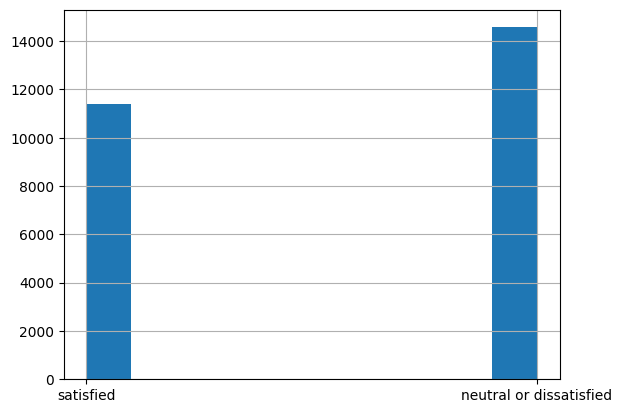

In [ ]:
df.satisfaction.hist()

<Axes: >

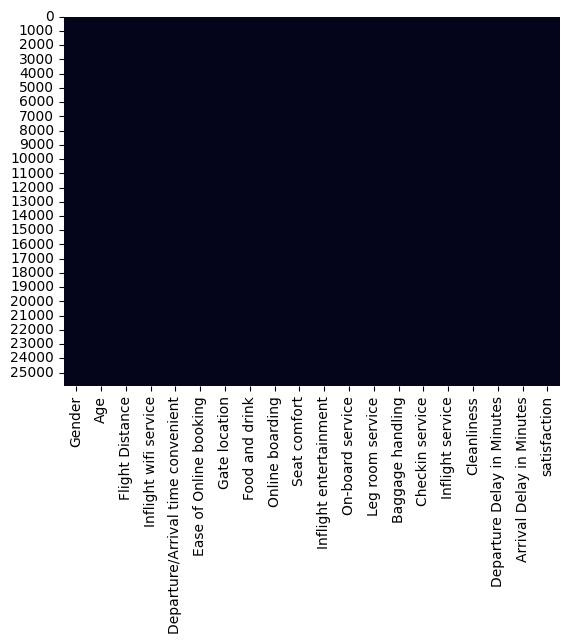

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(percent_missing)

Gender                               0.0
Age                                  0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64


# The dataset contained missing values in Arrival delay in Minutes. We replace all missing values with 0, assuming they are equal to 0.

# ##Arrival delay in minutes plays an important role in customer satisfaction as customers traveling for business will be happier arriving on time. The variable is important in customer satisfaction.


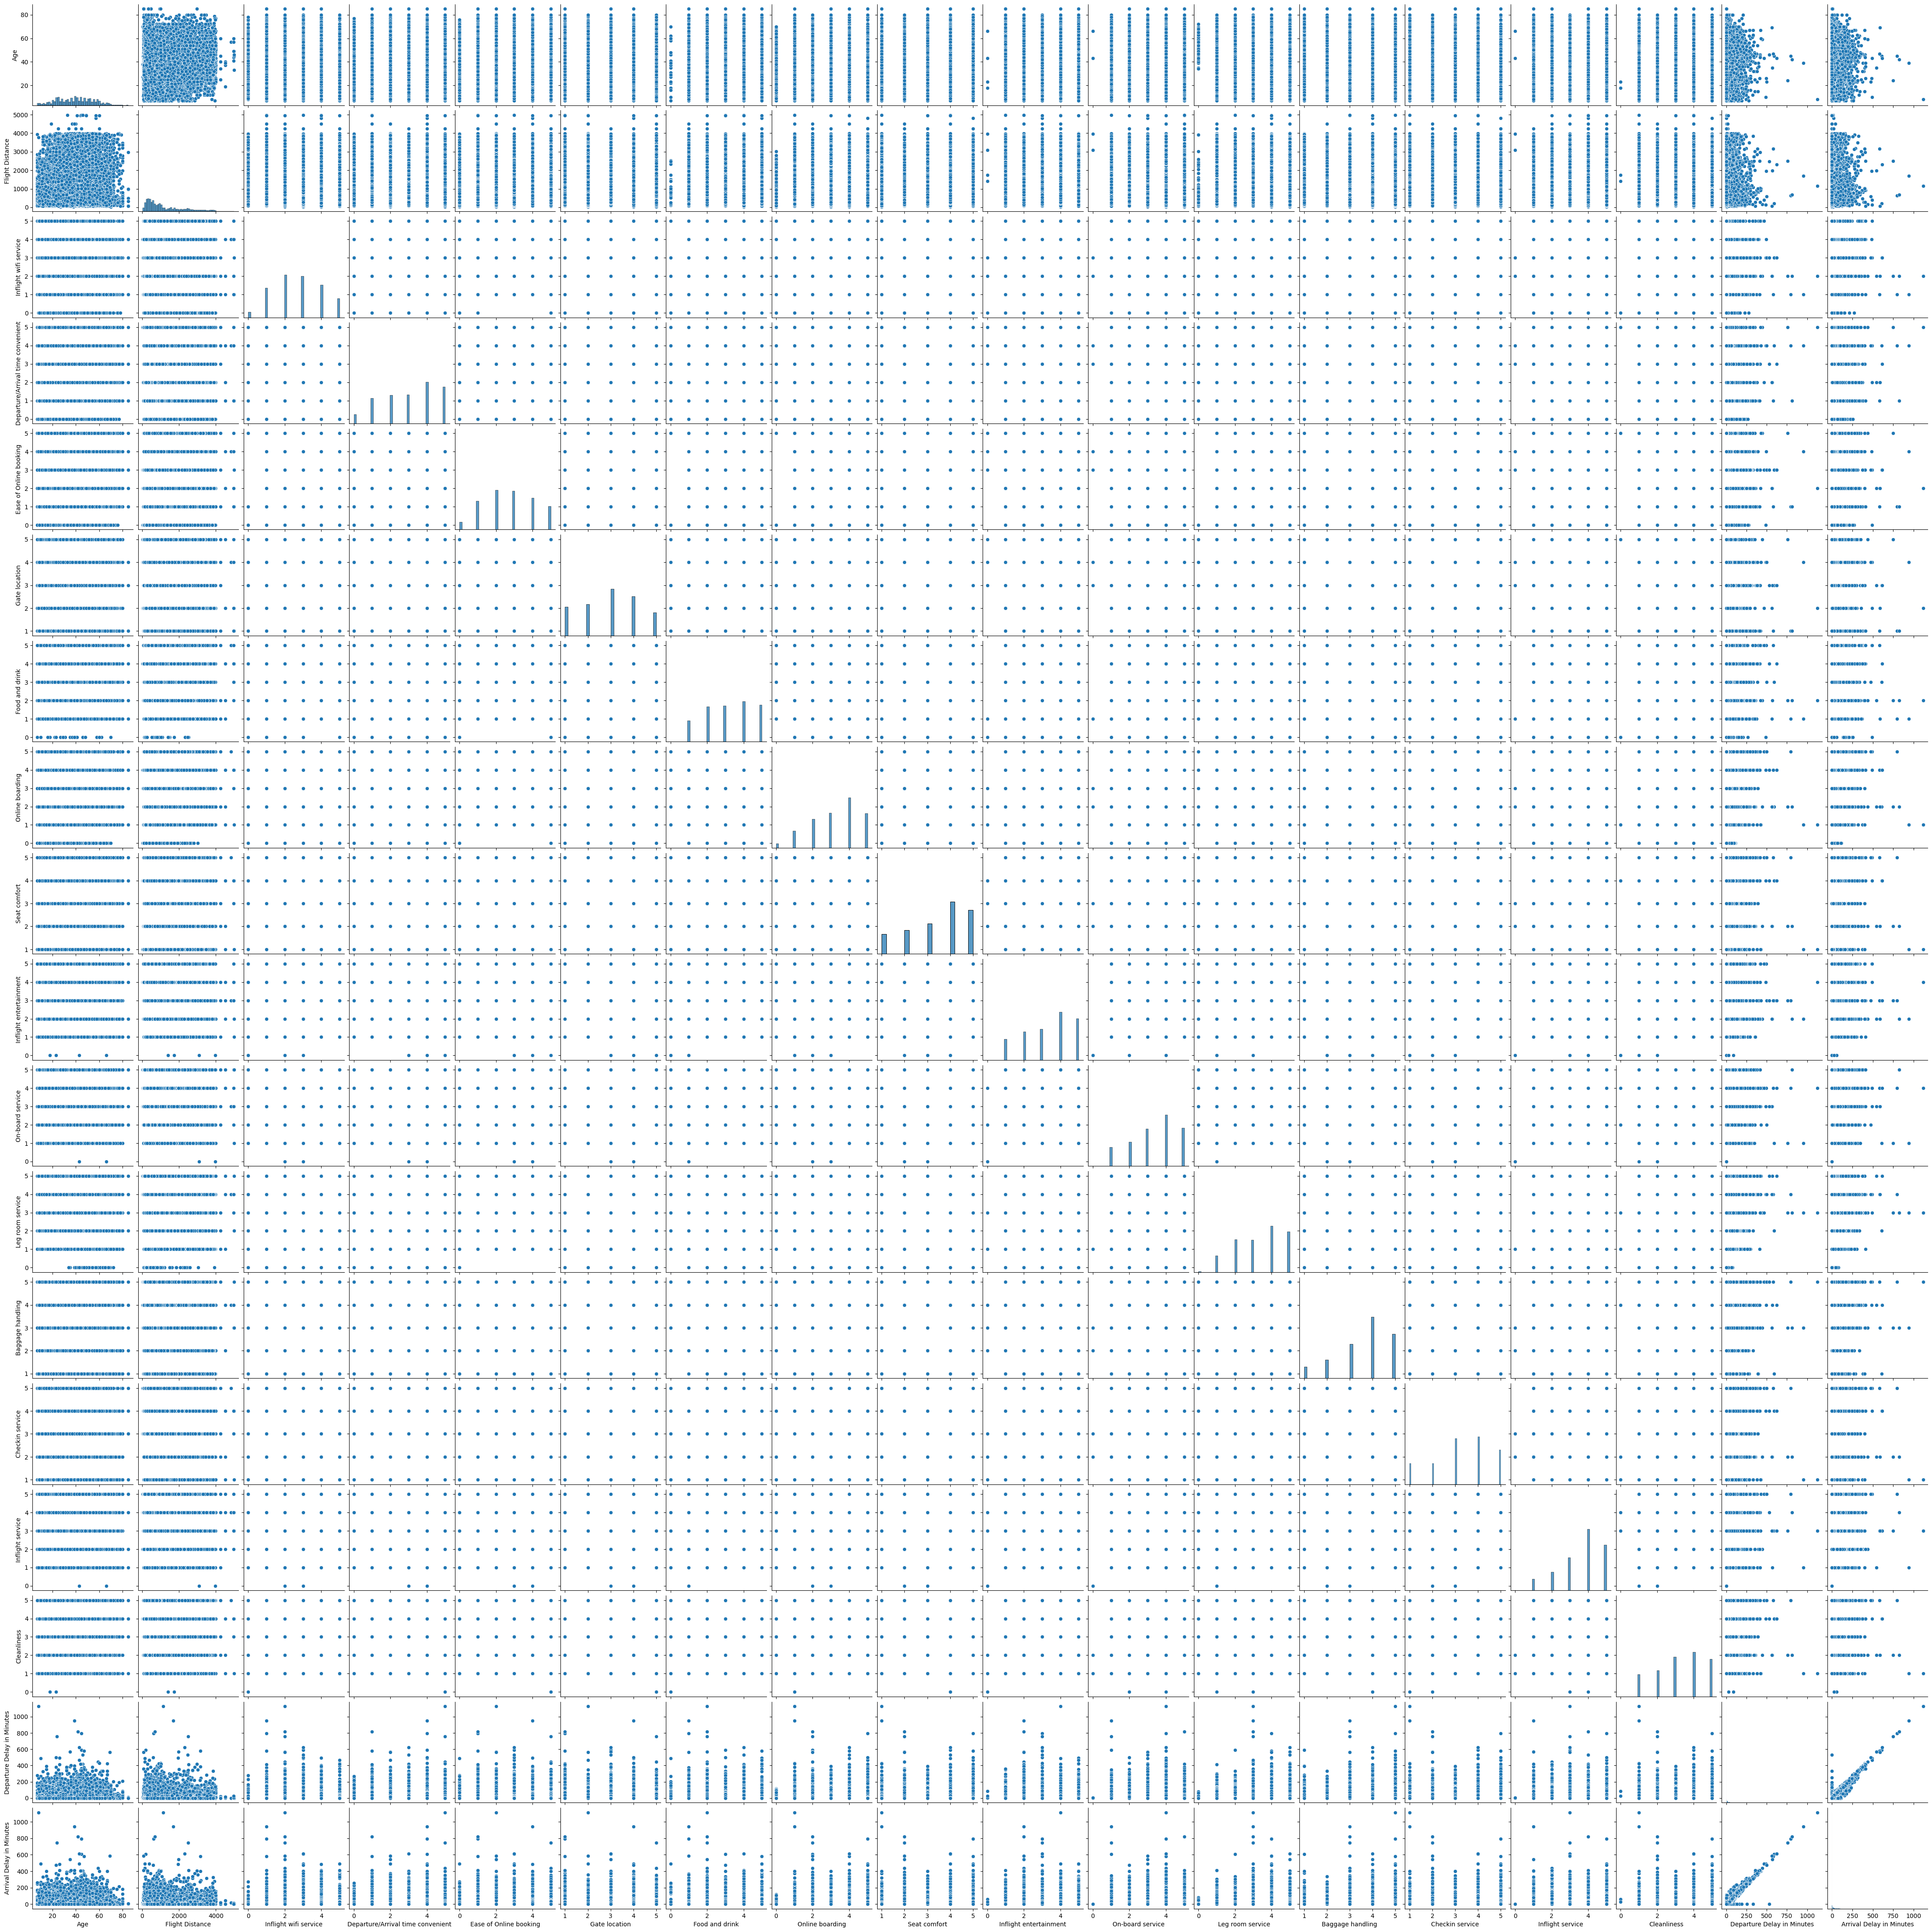

In [ ]:
# Build pairplot
sns.pairplot(df)

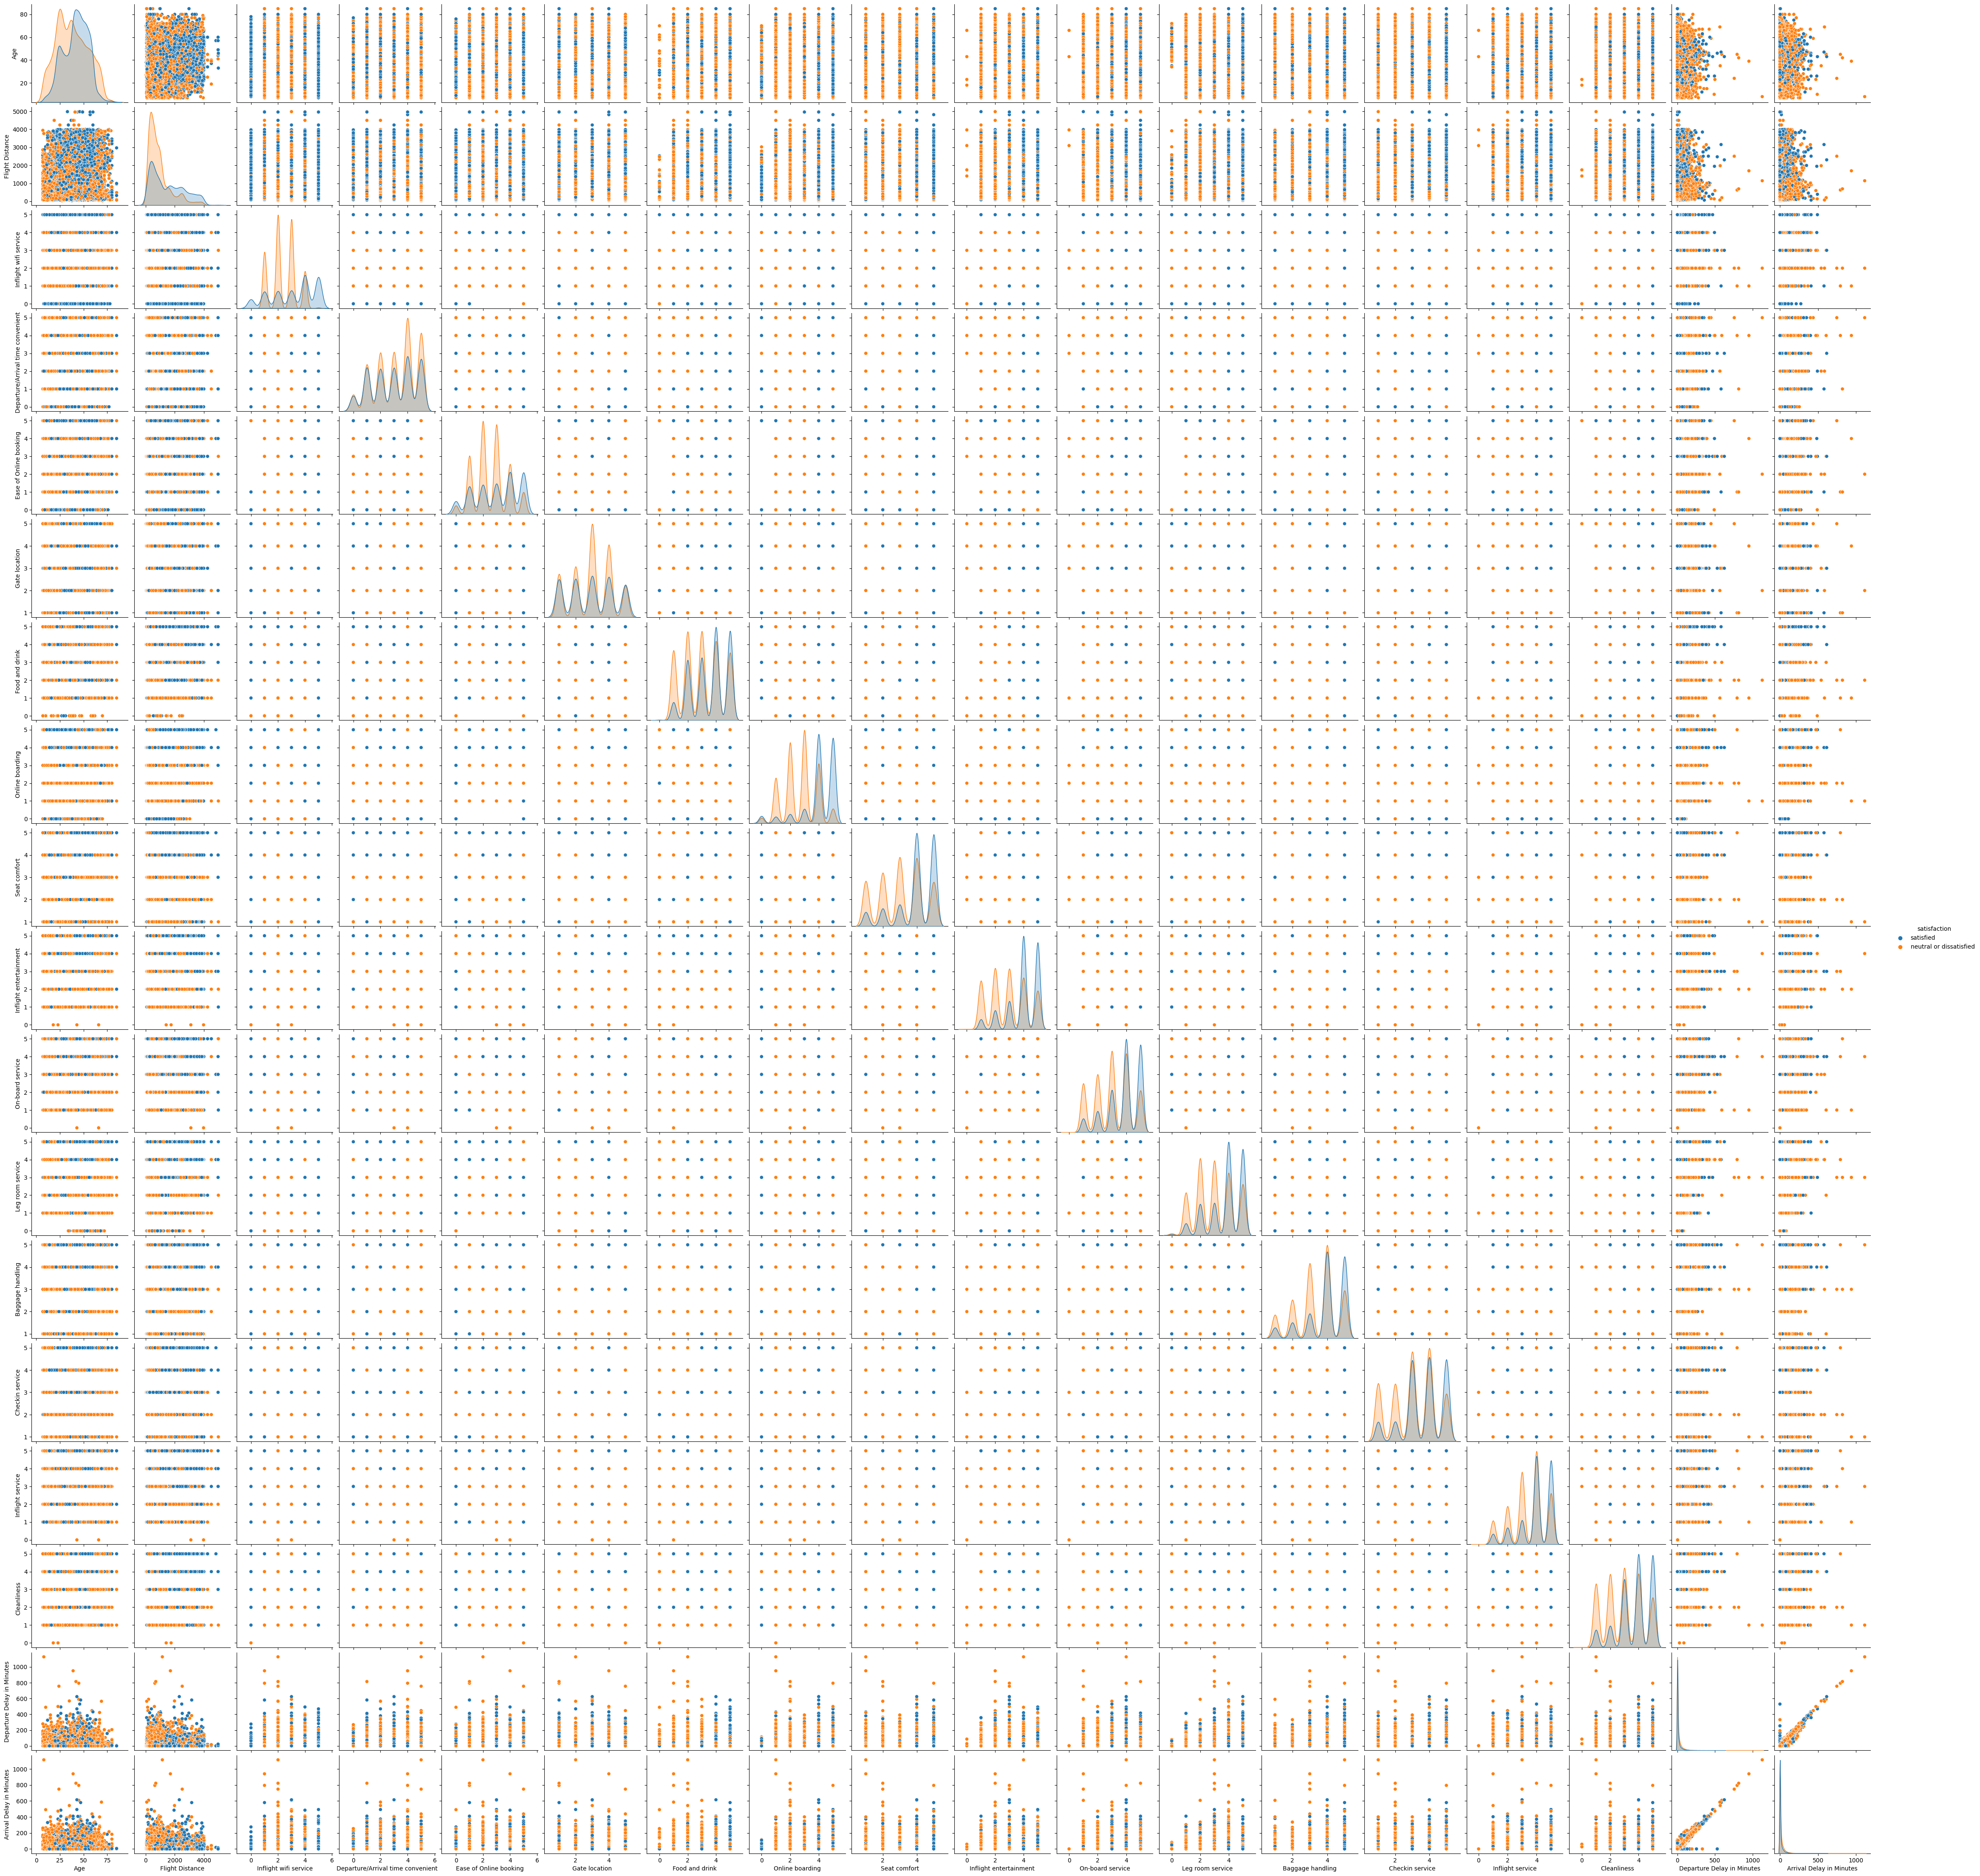

In [ ]:
sns.pairplot(df, hue = 'satisfaction')

In [ ]:
df['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'],  [0, 1], inplace=True)

In [ ]:
df['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)

In [ ]:
df

Gender  Age  Flight Distance  Inflight wifi service  \
0           1   52              160                      5   
1           1   36             2863                      1   
2           0   20              192                      2   
3           0   44             3377                      0   
4           1   49             1182                      2   
...       ...  ...              ...                    ...   
25971       0   34              526                      3   
25972       0   23              646                      4   
25973       1   17              828                      2   
25974       0   14             1127                      3   
25975       1   42              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0                  4               3                4             3   
1                  1               5                4             5   
2                  4               2                2             2   
3                  2               3                4             4   
4                  3               4                1             2   
...              ...             ...              ...           ...   
25971              1               4                3             4   
25972              4               4                4             4   
25973              5               2                1             2   
25974              3               4                4             4   
25975              5               4                2             2   

       Inflight entertainment  On-board service  Leg room service  \
0                           5                 5                 5   
1                           4                 4                 4   
2                           2                 4                 1   
3                           1                 1                 1   
4                           2                 2                 2   
...                       ...               ...               ...   
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974                       4                 3                 2   
25975                       1                 1                 2   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     5                2                 5            5   
1                     4                3                 4            5   
2                     3                2                 2            2   
3                     1                3                 1            4   
4                     2                4                 2            4   
...                 ...              ...               ...          ...   
25971                 4                4                 5            4   
25972                 5                5                 5            4   
25973                 4                5                 4            2   
25974        

In [ ]:
df.corr()

Gender       Age  Flight Distance  \
Gender                             1.000000 -0.009261         0.005222   
Age                               -0.009261  1.000000         0.099409   
Flight Distance                    0.005222  0.099409         1.000000   
Inflight wifi service              0.006323  0.009242         0.005007   
Departure/Arrival time convenient -0.008417  0.032449        -0.014401   
Ease of Online booking            -0.001703  0.013565         0.062989   
Gate location                      0.005628  0.003308         0.008410   
Food and drink                     0.014422  0.023841         0.057322   
Online boarding                    0.056031  0.202058         0.214629   
Seat comfort                       0.047765  0.154507         0.158957   
Inflight entertainment             0.005217  0.068998         0.137538   
On-board service                   0.000423  0.054977         0.117880   
Leg room service                  -0.028051  0.033299         0.136995   
Baggage handling                  -0.032202 -0.049863         0.071549   
Checkin service                   -0.000079  0.025388         0.075720   
Inflight service                  -0.034890 -0.059083         0.066355   
Cleanliness                        0.011605  0.048418         0.105578   
Departure Delay in Minutes        -0.005775 -0.004334         0.003446   
Arrival Delay in Minutes          -0.005167 -0.007359         0.000117   
satisfaction                      -0.007335  0.121697         0.295292   

                                   Inflight wifi service  \
Gender                                          0.006323   
Age                                             0.009242   
Flight Distance                                 0.005007   
Inflight wifi service                           1.000000   
Departure/Arrival time convenient               0.349137   
Ease of Online booking                          0.710684   
Gate location                                   0.347790   
Food and drink                                  0.122306   
Online boarding                                 0.459366   
Seat comfort                                    0.116991   
Inflight entertainment                          0.201782   
On-board service                                0.113658   
Leg room service                                0.159699   
Baggage handling                                0.118199   
Checkin service                                 0.046046   
Inflight service                                0.108419   
Cleanliness                                     0.125768   
Departure Delay in Minutes                     -0.010078   
Arrival Delay in Minutes                       -0.012553   
satisfaction                                    0.280395   

                                   Departure/Arrival time convenient  \
Gender                                                     -0.008417   
Age                                                         0.032449   
Flight Distance                                            -0.014401   
Inflight wifi service                                       0.349137   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.440230   
Gate location                                               0.458439   
Food and drink                                             -0.016006   
Online boarding                                             0.080937   
Seat comfort                                               -0.001926   
Inflight entertainment                                     -0.022326   
On-board service                                            0.060982   
Leg room service                                            0.003373   
Baggage handling                                            0.065684   
Checkin service                                             0.082461   
Inflight service                                            0.067804 

# We were able to transform satisfaction (dependent variable) into a binary variable since neutral or dissatisfied is represented by 0 and satisfied customers by 1.

In [ ]:
df.drop(df[df['Departure Delay in Minutes']> 9000].index, inplace= True)
df.drop(df[df['Arrival Delay in Minutes']> 9000].index, inplace= True)

*Multiple* Linear Regression




In [ ]:
X = df.drop('satisfaction', axis=1)
Y = df['satisfaction']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [ ]:
train_X, valid_X, train_Y, valid_Y= train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
re_satisfaction=LinearRegression()
re_satisfaction.fit(train_X, train_Y)

LinearRegression()

In [ ]:
re_satisfaction.intercept_

-0.7073609857821523

In [ ]:
re_satisfaction.coef_

array([-2.75693823e-02,  5.82917787e-04,  8.09145451e-05,  5.51330806e-02,
       -4.61674899e-02, -2.47789221e-02,  1.19808651e-02, -1.14399497e-02,
        1.15009004e-01,  1.62185443e-02,  3.56773714e-02,  4.44890137e-02,
        4.67417935e-02,  1.12120553e-02,  3.54543410e-02,  5.48747135e-03,
        2.19686529e-02,  1.77759071e-04, -6.64455995e-04])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [ ]:
pred_Y=re_satisfaction.predict(valid_X)

In [ ]:
import math
print('Regression model performance evoluation' )
print('r2: ', r2_score(valid_Y, pred_Y))
print('MAE: ', mean_absolute_error(valid_Y, pred_Y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_Y, pred_Y)))
print('Max_error: ', max_error(valid_Y, pred_Y))

Regression model performance evoluation
r2:  0.4243719028885996
MAE:  0.3065184896982893
RMSE:  0.3761321943907801
Max_error:  1.4612136310870523


# 42.4% of the variance in the response variable(satisfaction) can be explained by the predictor variable in the regression model.

#42,4% % of variation in the Custumer satisfaction is explained  by ender	Age	,Flight Distance,	Inflight wifi service,	Departure/Arrival time convenient,	Ease of Online booking,	Gate location,	Food and drink,	Online boarding	,Seat comfort	,Inflight entertainment,	On-board service,	Leg room service,	Baggage handling,	Checkin service,	Inflight service,	Cleanliness,	Departure Delay in Minutes,	Arrival Delay in Minutes.

#The MAE shows the mean absolute difference between the predicted values and the actual values in a dataset.

#The RMSE  tells us the average distance between the predicted values from the model and the actual values in the dataset.Which is not large in this case.

#Max_error is the absolute value of the most significant difference between a predicted variable and its real value. If the Maximum Error is much bigger than the RMSE, it might mean that the model has not correctly predicted outliers.But in this model, the outliers have been removed.

#The MAE,RMSE ana Max_Error are not very significant.

# The model is useful.


Logistic Regression












In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
Y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(Y_test,Y_pred)

array([[3834,  569],
       [ 748, 2642]])

In [ ]:
logmodel.coef_

array([[-1.96405919e-01,  2.46136333e-03,  5.27445974e-04,
         4.08696391e-01, -3.08892817e-01, -2.03116021e-01,
         6.88305493e-02, -6.74644010e-02,  7.18523192e-01,
         1.02878185e-01,  2.10840828e-01,  2.94911395e-01,
         3.01245631e-01,  5.12185203e-02,  2.33358919e-01,
         2.79084060e-02,  1.44078321e-01,  3.88658983e-04,
        -4.69698202e-03]])

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4403
           1       0.82      0.78      0.80      3390

    accuracy                           0.83      7793
   macro avg       0.83      0.83      0.83      7793
weighted avg       0.83      0.83      0.83      7793



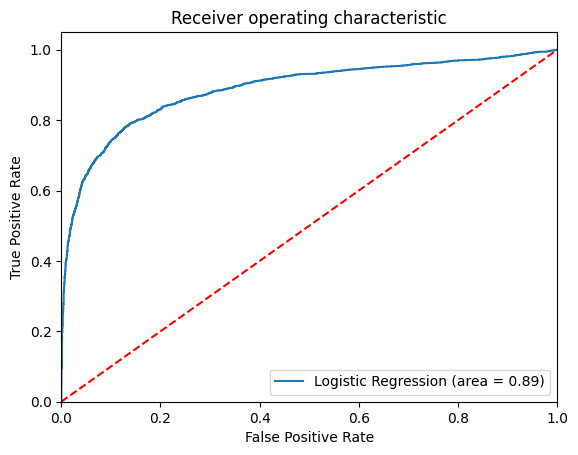

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(Y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print('satisfaction rate : ', df.satisfaction.mean())

satisfaction rate :  0.4389821373575608


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.530369
         Iterations 6
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.227     
Dependent Variable:        satisfaction          AIC:                   19325.3859
Date:                      2023-04-13 19:28      BIC:                   19473.7425
No. Observations:          18183                 Log-Likelihood:        -9643.7   
Df Model:                  18                    LL-Null:               -12475.   
Df Residuals:              18164                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            6.0000                                                 
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------

#  Based on the collected information, we found that the p-value of seat comfort is greater than 0.05, which means, we cannot conclude that the explanatory variable affects the dependent variable. In the next stage of the project, we will remove all insignificant variables and rerun the different new models, then compare them to the previous models.




Decision Trees





In [ ]:
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
Y_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(Y_test,Y_pred)

array([[3834,  569],
       [ 748, 2642]])

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4403
           1       0.84      0.81      0.82      3390

    accuracy                           0.85      7793
   macro avg       0.85      0.85      0.85      7793
weighted avg       0.85      0.85      0.85      7793



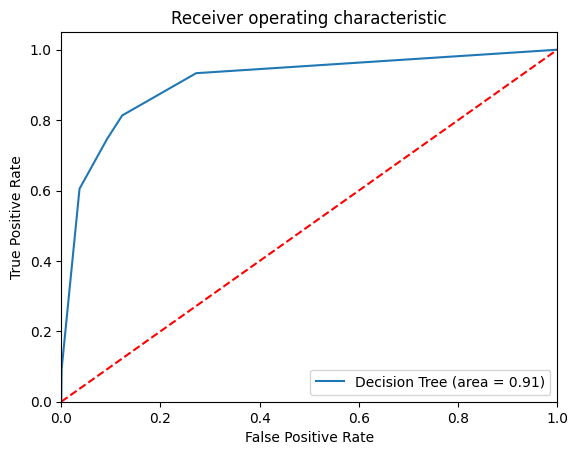

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

dt_roc_auc = roc_auc_score(Y_test, dt_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

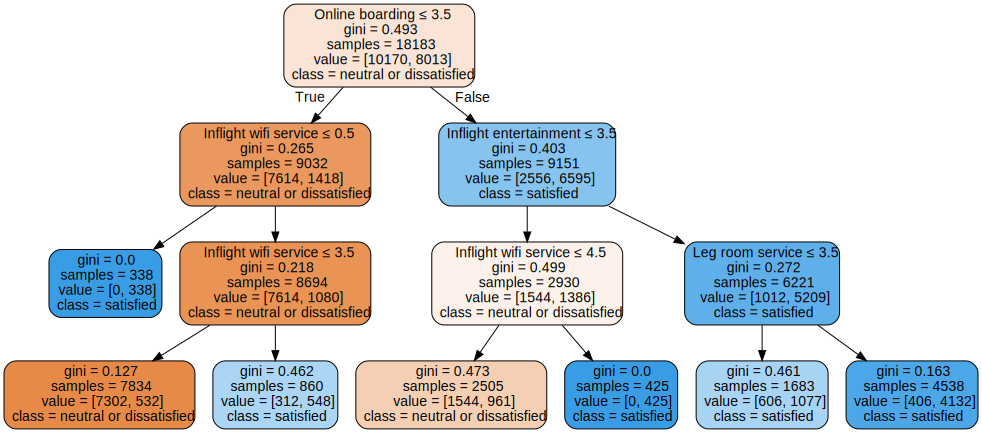

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None,
                      feature_names=X.columns,
                      class_names=['neutral or dissatisfied','satisfied'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,Y_train)

Y_pred_rf = rf_model.predict(X_test)

confusion_matrix(Y_test,Y_pred_rf)

array([[4029,  374],
       [ 414, 2976]])

In [ ]:
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4403
           1       0.89      0.88      0.88      3390

    accuracy                           0.90      7793
   macro avg       0.90      0.90      0.90      7793
weighted avg       0.90      0.90      0.90      7793



In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train,Y_train)

print(classification_report(Y_test, rf_random.predict(X_test)))

In [ ]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,Y_train)

Y_pred_bt = bt_model.predict(X_test)

confusion_matrix(Y_test,Y_pred_bt)

array([[4030,  373],
       [ 451, 2939]])

In [ ]:
print(classification_report(Y_test,Y_pred_bt))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4403
           1       0.89      0.87      0.88      3390

    accuracy                           0.89      7793
   macro avg       0.89      0.89      0.89      7793
weighted avg       0.89      0.89      0.89      7793



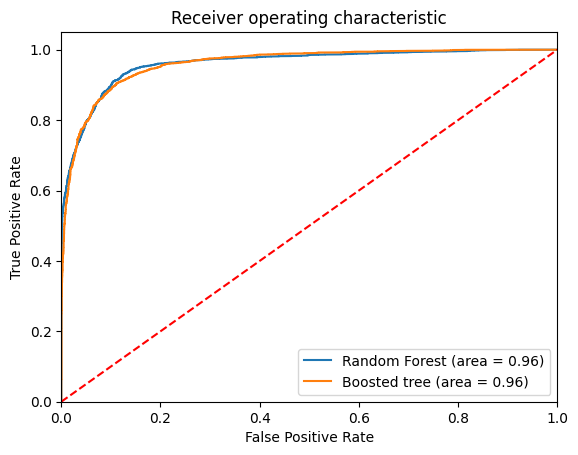

In [ ]:
# Random Forest
rf_roc_auc = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(Y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(Y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



k-Nearest Neighbors (kNN)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(Y_test,Y_pred))
params = {'n_neighbors': range(1, 31)}
grid = GridSearchCV(knn, params, cv=5, scoring='roc_auc')
grid.fit(X_train, Y_train)
print('Best k:', grid.best_params_['n_neighbors'])
y_pred_proba = grid.predict_proba(X_test)[:, 1]
print('ROC AUC:', roc_auc_score(Y_test, y_pred_proba))

ROC AUC:  0.8859311866339457
Best k: 18
ROC AUC: 0.9593204753798195


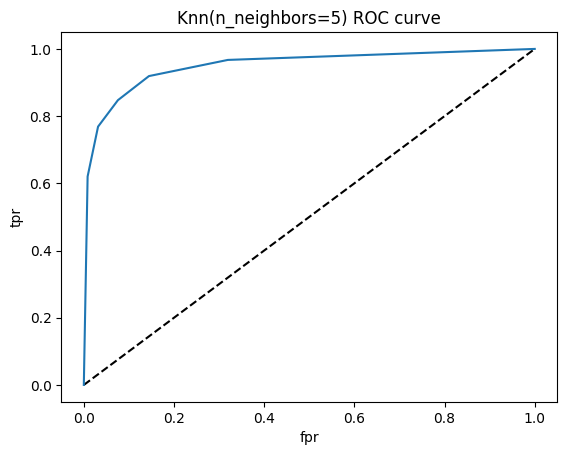

0.949569279996141

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred_proba)

# **Deep Learning**
# **_Keras_Classification.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [ ]:
X_train.shape

(18183, 19)

In [ ]:
# build the model
model = Sequential()

In [ ]:

# add input layer
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

In [ ]:
# add hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

In [ ]:
# add hidden layer
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))


In [ ]:
# add output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# set early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
# fit the model
history = model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_data=(X_test, Y_test), callbacks=[early_stop])

Epoch 1/1000
569/569 [==============================] - 3s 3ms/step - loss: 0.6349 - accuracy: 0.6360 - val_loss: 0.4553 - val_accuracy: 0.8187
Epoch 2/1000
569/569 [==============================] - 2s 3ms/step - loss: 0.4784 - accuracy: 0.7934 - val_loss: 0.3598 - val_accuracy: 0.8592
Epoch 3/1000
569/569 [==============================] - 3s 5ms/step - loss: 0.4188 - accuracy: 0.8315 - val_loss: 0.3233 - val_accuracy: 0.8645
Epoch 4/1000
569/569 [==============================] - 2s 4ms/step - loss: 0.3836 - accuracy: 0.8451 - val_loss: 0.2941 - val_accuracy: 0.8834
Epoch 5/1000
569/569 [==============================] - 3s 5ms/step - loss: 0.3549 - accuracy: 0.8593 - val_loss: 0.2679 - val_accuracy: 0.8881
Epoch 6/1000
569/569 [==============================] - 2s 3ms/step - loss: 0.3336 - accuracy: 0.8690 - val_loss: 0.2587 - val_accuracy: 0.8899
Epoch 7/1000
569/569 [==============================] - 2s 3ms/step - loss: 0.3196 - accuracy: 0.8730 - val_loss: 0.2459 - val_accuracy:

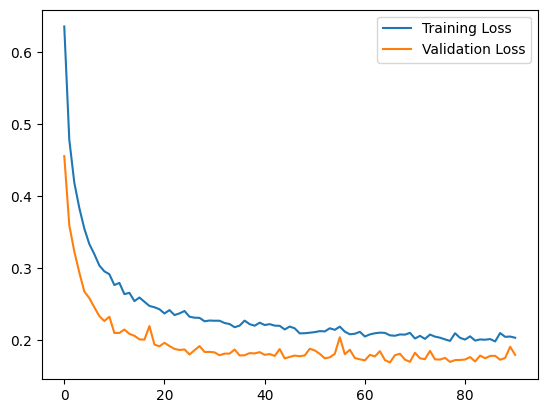

In [ ]:
# plot training and validation losses versus epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
y_pred =(model.predict(X_test) > 0.5).astype("int32")

244/244 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4403
           1       0.90      0.85      0.87      3390

    accuracy                           0.89      7793
   macro avg       0.89      0.89      0.89      7793
weighted avg       0.89      0.89      0.89      7793



In [ ]:
print(confusion_matrix(Y_test,Y_pred))
print('ROC AUC: ', roc_auc_score(Y_test,model.predict(X_test)))

[[4070  333]
 [ 517 2873]]
244/244 [==============================] - 0s 1ms/step
ROC AUC:  0.9825943627869709


# **Artificial Neural Networks**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [ ]:
# Develop an ANN model with a single hidden layer with 20 nodes
model = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000)
model.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000)

In [ ]:
# Assess model performance
Y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(roc_auc_score(Y_test, Y_pred))

[[4151  252]
 [ 320 3070]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4403
           1       0.92      0.91      0.91      3390

    accuracy                           0.93      7793
   macro avg       0.93      0.92      0.93      7793
weighted avg       0.93      0.93      0.93      7793

0.9241855077357419


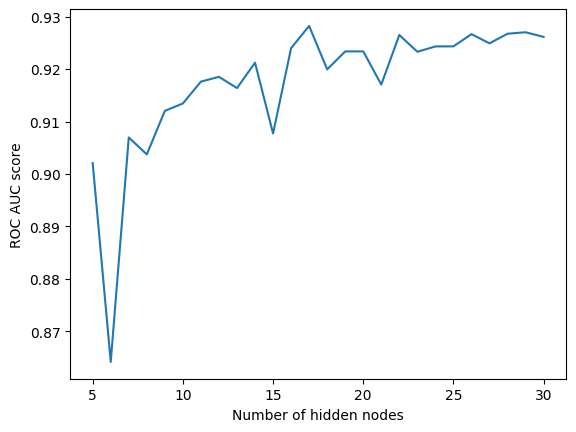

In [ ]:
# Assess the effect of the number of hidden nodes (5-30) on model accuracy
results = []
for i in range(5, 31):
    model = MLPClassifier(hidden_layer_sizes=(i,), max_iter=1000)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    results.append(roc_auc_score(Y_test, Y_pred))
plt.plot(range(5, 31), results)
plt.xlabel('Number of hidden nodes')
plt.ylabel('ROC AUC score')
plt.show()

In [ ]:
# Identify an optimal number of nodes
optimal_nodes = np.argmax(results) + 5
print('Optimal number of nodes:', optimal_nodes)

Optimal number of nodes: 17


# After running several models such as multiple linear regression, logistic regression, decision trees, and k-nearest neighbors (kNN). The random forest and boosted tree models are the best with 0.96 as the roc_auc score. Both models’ dominances are similar across the entire graph.